# Customer Churn EDA and Churn prediction

In [127]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [186]:
df=pd.read_csv("/Users/ravina/Desktop/Customer-Churn-Records.csv")

In [187]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [188]:
df['Exited'].value_counts()

Exited
0    7962
1    2038
Name: count, dtype: int64

# Target column is unbalanced, needs to be balanced before model training.

In [189]:
df.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [191]:
# Statistical analysis of the numerical columns
df.describe() 


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [192]:
df.describe(include=object)

,Surname,Geography,Gender,Card Type
count,10000,10000,10000,10000
unique,2932,3,2,4
top,Smith,France,Male,DIAMOND
freq,32,5014,5457,2507


top_features
top 8 important features: Index(['Complain', 'Age', 'NumOfProducts', 'Balance', 'IsActiveMember',
       'CreditScore', 'Point Earned', 'EstimatedSalary'],
      dtype='object')

RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card Type           10000 non-null  object 
 17  Point Earned 

In [193]:
# Handle categorical variables using one-hot encoding
#df = pd.get_dummies(df, columns=['Geography', 'Gender', 'Card Type'],dtype=int,drop_first=True)

# Remove irrelevant columns,top five columns ['Complain', 'Age', 'NumOfProducts', 'IsActiveMember', 'Balance']
#df = df.drop(['RowNumber', 'CustomerId', 'Surname',"HasCrCard","Satisfaction Score","Geography","Gender","Card Type",], axis=1)
#df = df.drop(['RowNumber', 'CustomerId', 'Surname',"HasCrCard","Satisfaction Score","Geography","Gender","Card Type","CreditScore","Tenure","EstimatedSalary","Point Earned","Complain"], axis=1)
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [194]:
#df = pd.get_dummies(df, columns=['Geography', 'Gender', 'Card Type'], dtype=int)

In [195]:
df.shape

(10000, 21)

In [196]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,...,Point Earned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,619,42,2,0.00,1,1,1,101348.88,1,1,...,464,1,0,0,1,0,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,...,456,0,0,1,1,0,1,0,0,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,...,377,1,0,0,1,0,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,...,350,1,0,0,1,0,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,...,425,0,0,1,1,0,0,1,0,0


<Axes: >

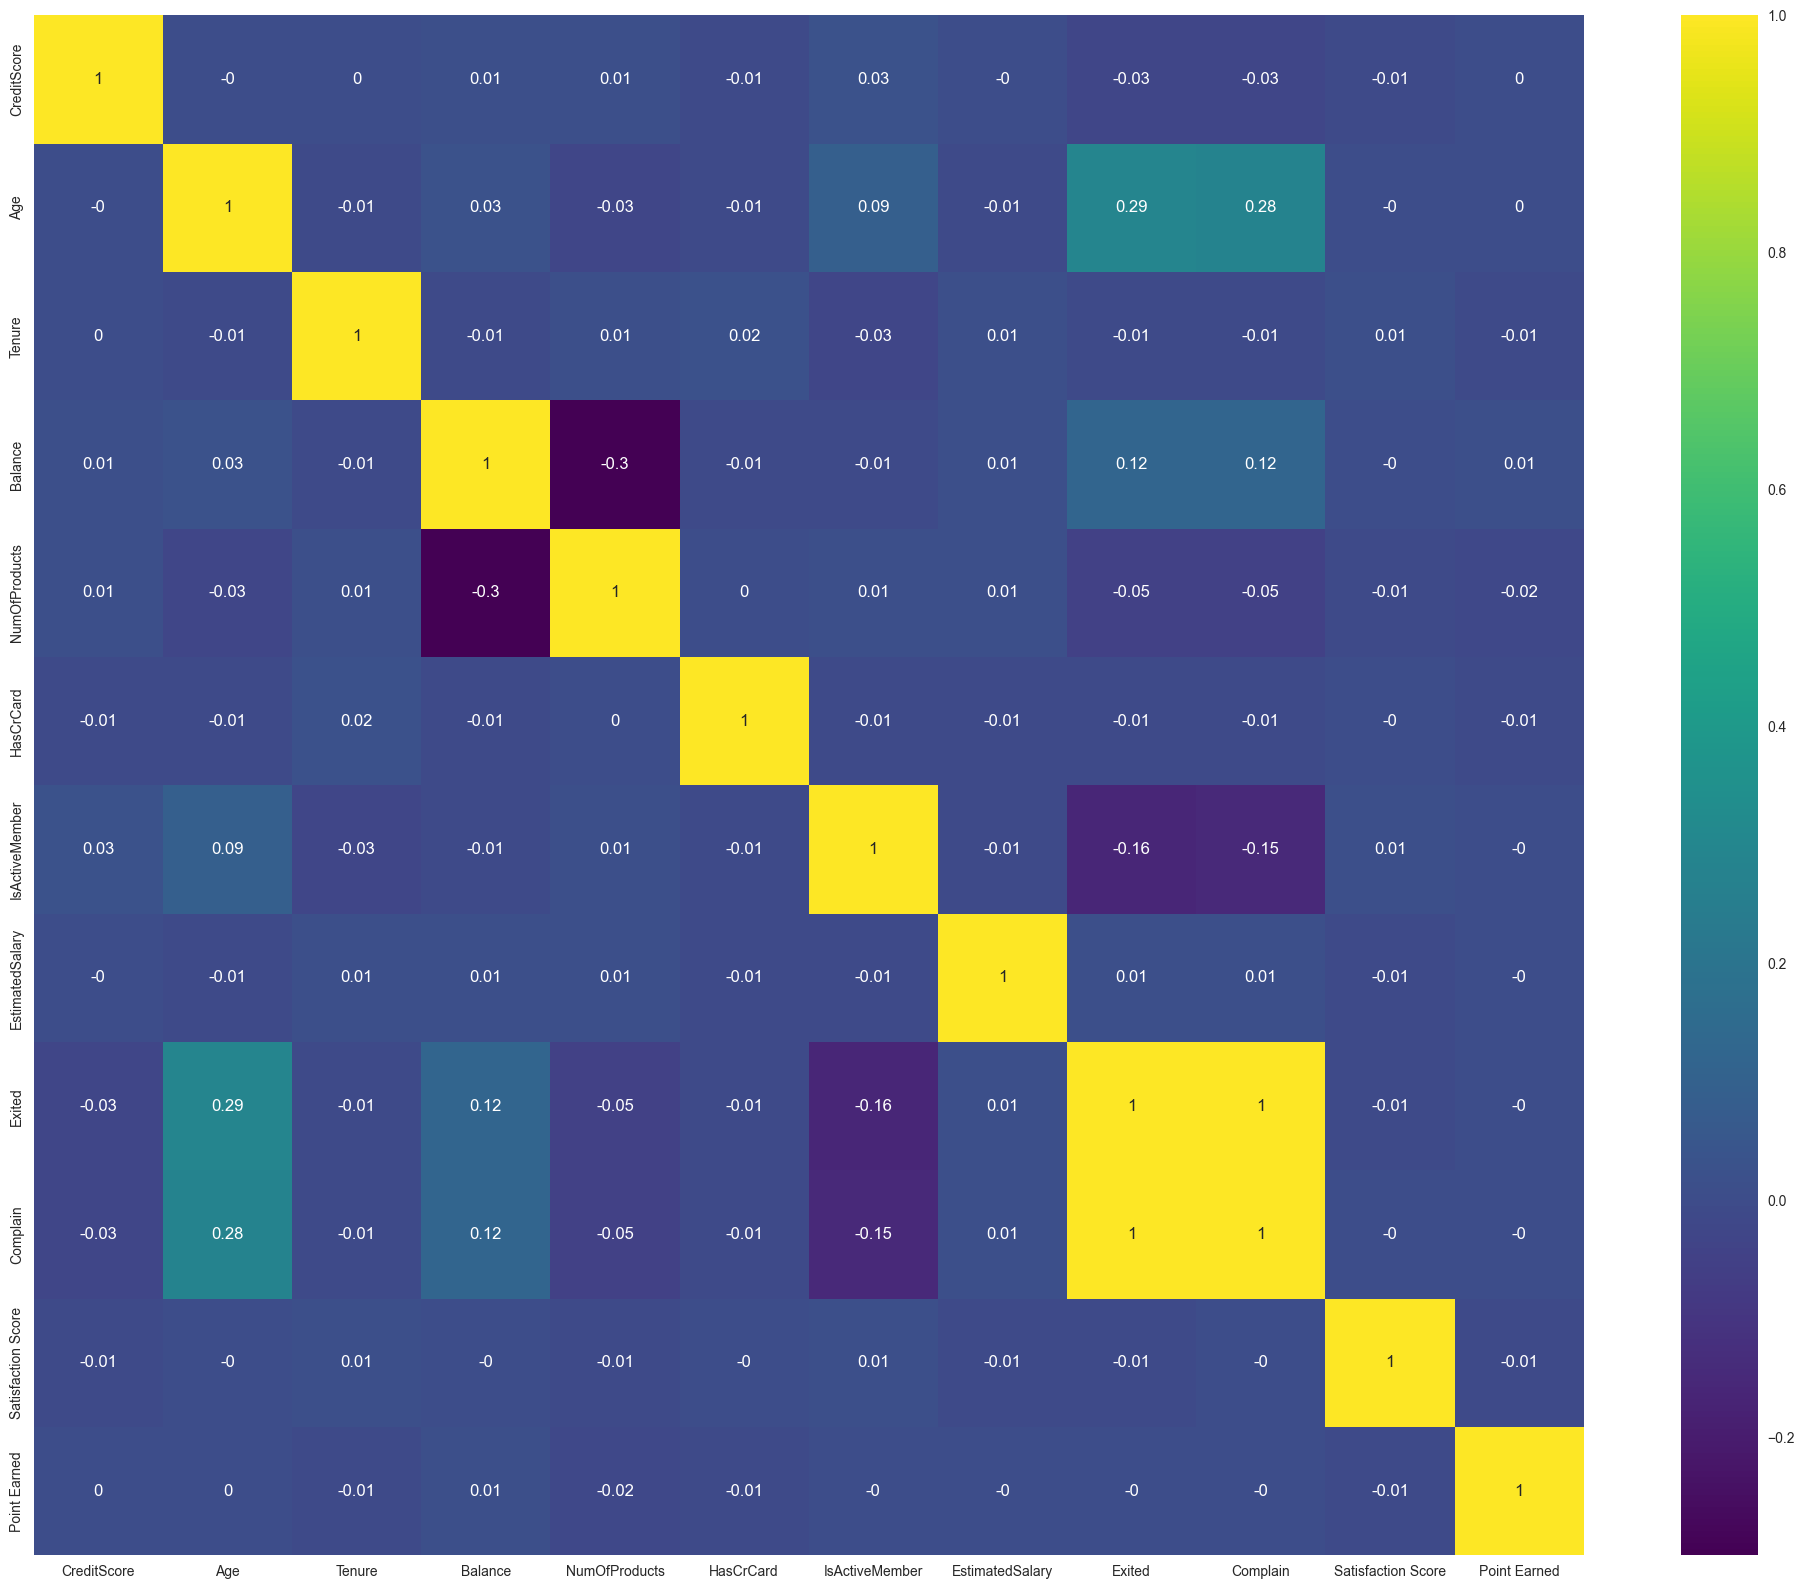

In [138]:
numeric_df = df.select_dtypes(include=['number'])
corr = numeric_df.corr().round(2)

plt.figure(figsize = (25,20))
sns.heatmap(corr, annot = True, cmap = 'viridis')


In [139]:
# here complain column has 100% co relation with target column exited. drop the complain colum to avoid overfitting of the model. 
df.drop(columns=['Complain'], inplace=True)

<Axes: xlabel='Point Earned', ylabel='Count'>

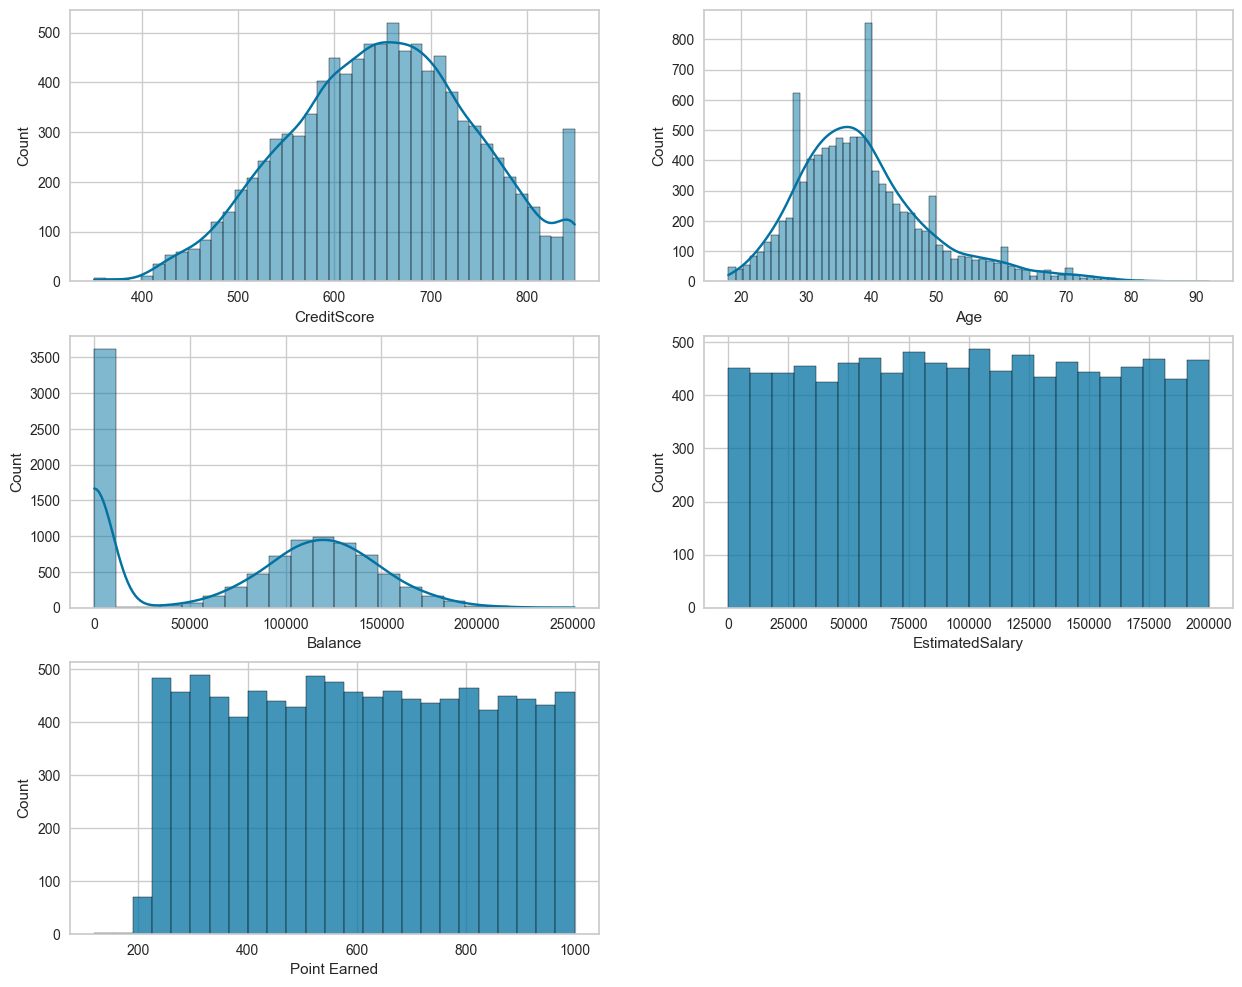

In [140]:
plt.figure(figsize = (15, 12))

plt.subplot(3, 2, 1)
sns.histplot(x = df['CreditScore'], kde = True)

plt.subplot(3, 2, 2)
sns.histplot(x = df['Age'], kde = True)

plt.subplot(3, 2, 3)
sns.histplot(x = df['Balance'], kde = True)

plt.subplot(3, 2, 4)
sns.histplot(x = df['EstimatedSalary'])

plt.subplot(3, 2, 5)
sns.histplot(x = df['Point Earned'])

## Continuous Variables Observation

- Most continuous variables are well balanced.
- The estimated salary shows practically the same number of people for each salary range.
- The variable `PointEarned` exhibits near to balanced distribution.
- `CreditScore` and `Age` shows a non-perfect normal distribution.
- The `Balance` variable indicates that most data points are from people with zero balance in their accounts, with those who have a balance being relatively balanced.


/var/folders/3t/5qtlv2451k3fkqv9ls22lmg00000gn/T/ipykernel_91858/4230745673.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Geography', palette = 'spring', data = df)
/var/folders/3t/5qtlv2451k3fkqv9ls22lmg00000gn/T/ipykernel_91858/4230745673.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Gender', palette = 'cool', data = df)
/var/folders/3t/5qtlv2451k3fkqv9ls22lmg00000gn/T/ipykernel_91858/4230745673.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Tenure', palette = 'hot', data = df)
/var/folders/3t/5qtlv24

<Axes: title={'center': 'Card Type'}, xlabel='Card Type', ylabel='count'>

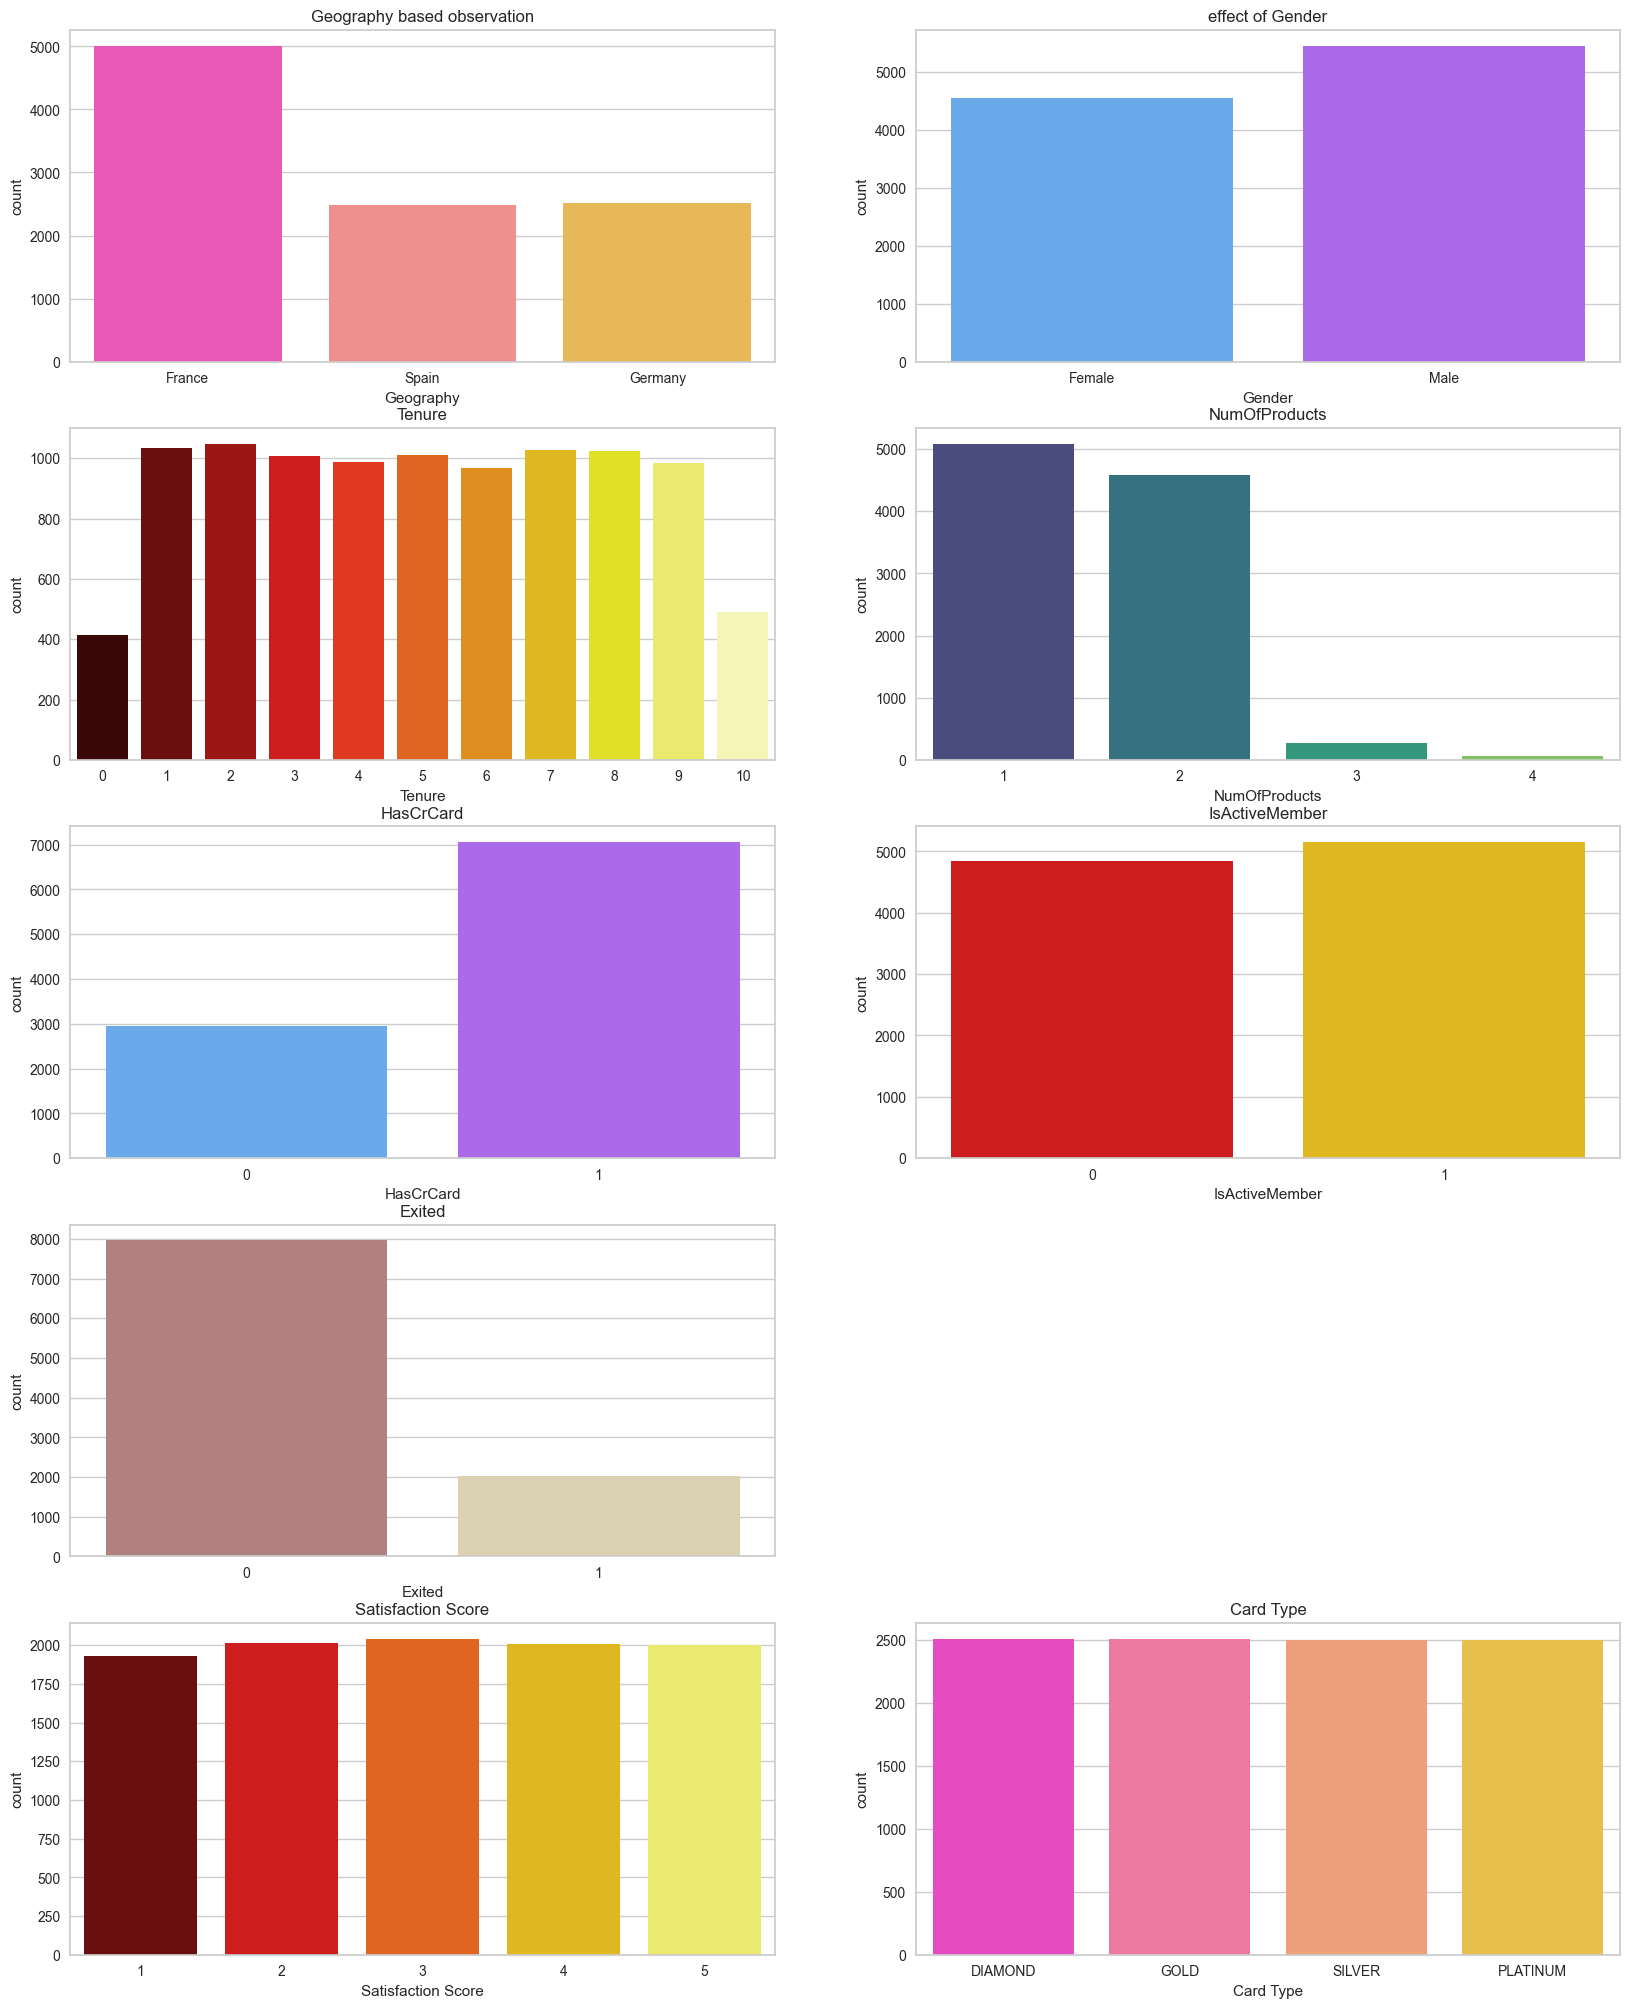

In [141]:
plt.figure(figsize = (20, 25))

plt.subplot(5, 2, 1)
plt.gca().set_title('Geography based observation')
sns.countplot(x = 'Geography', palette = 'spring', data = df)

plt.subplot(5, 2, 2)
plt.gca().set_title('effect of Gender')
sns.countplot(x = 'Gender', palette = 'cool', data = df)

plt.subplot(5, 2, 3)
plt.gca().set_title('Tenure')
sns.countplot(x = 'Tenure', palette = 'hot', data = df)

plt.subplot(5, 2, 4)
plt.gca().set_title('NumOfProducts')
sns.countplot(x = 'NumOfProducts', palette = 'viridis', data = df)

plt.subplot(5, 2, 5)
plt.gca().set_title('HasCrCard')
sns.countplot(x = 'HasCrCard', palette = 'cool', data = df)

plt.subplot(5, 2, 6)
plt.gca().set_title('IsActiveMember')
sns.countplot(x = 'IsActiveMember', palette = 'hot', data = df)

plt.subplot(5, 2, 7)
plt.gca().set_title('Exited')
sns.countplot(x = 'Exited', palette = 'pink', data = df)

plt.subplot(5, 2, 9)
plt.gca().set_title('Satisfaction Score')
sns.countplot(x = 'Satisfaction Score', palette = 'hot', data = df)

plt.subplot(5, 2, 10)
plt.gca().set_title('Card Type')
sns.countplot(x = 'Card Type', palette = 'spring', data = df)

# Categorical variables analysis:
* Most variables are well distributed.
* Majority of customers are from France.
* Gender distribution is balanced.
* Customers typically have 1 or 2 products.

# Target variable observation:
* Target variable distribution is imbalanced.
* Class balancing needs to be done to address the imbalance.


<Axes: title={'center': 'Boxplot CreditScore'}, xlabel='CreditScore'>

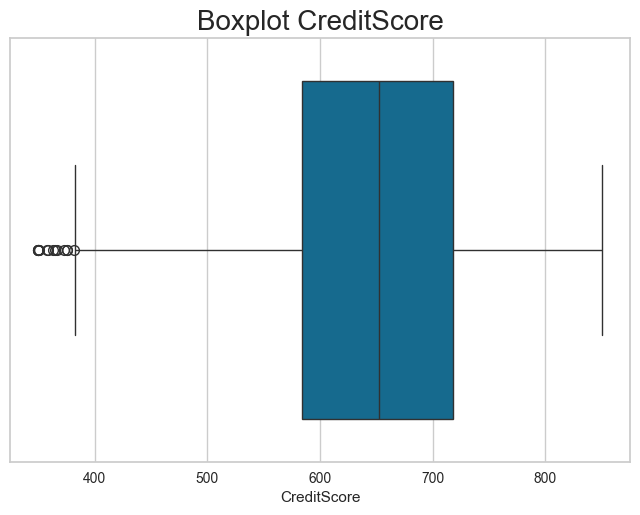

In [142]:
#Outlier detection
plt.title("Boxplot CreditScore", fontdict = {'fontsize': 20})
sns.boxplot(x=df["CreditScore"])


# We have many outliers in the CreditScore column and we will treat them using following code. 

In [143]:
from scipy.stats.mstats import winsorize

# Winsorize the CreditScore column to treat outliers
df['CreditScore'] = winsorize(df['CreditScore'], limits=[0.05, 0.05])


<Axes: title={'center': 'Boxplot CreditScore'}, xlabel='CreditScore'>

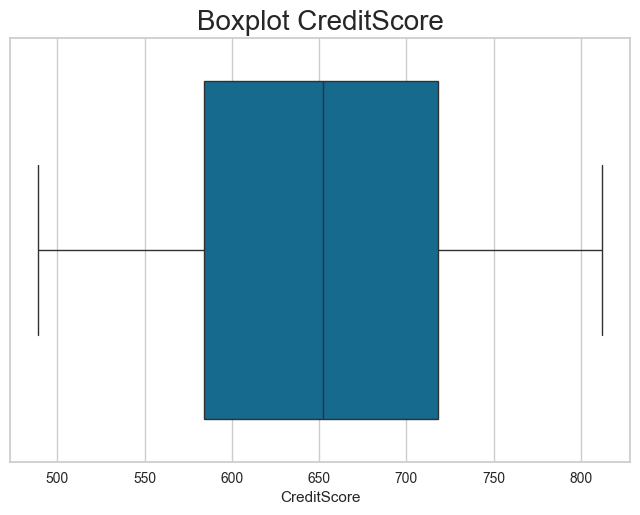

In [144]:
plt.title("Boxplot CreditScore", fontdict = {'fontsize': 20})
sns.boxplot(x=df["CreditScore"])

<Axes: title={'center': 'Boxplot Balance'}, xlabel='Balance'>

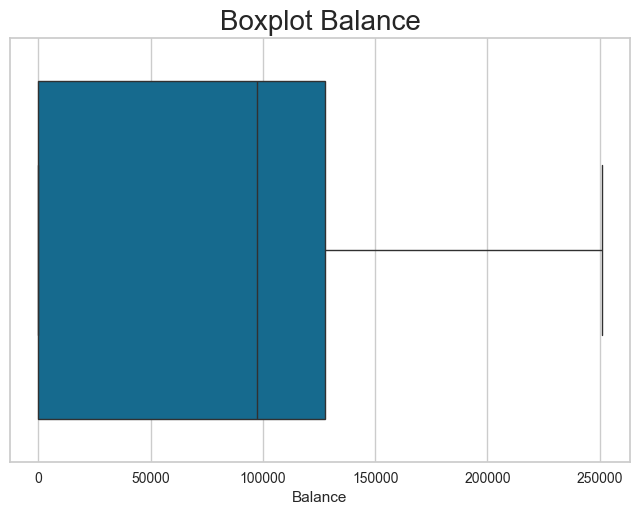

In [145]:
plt.title("Boxplot Balance", fontdict = {'fontsize': 20})
sns.boxplot(x=df["Balance"])


<Axes: title={'center': 'Boxplot EstimatedSalary'}, xlabel='EstimatedSalary'>

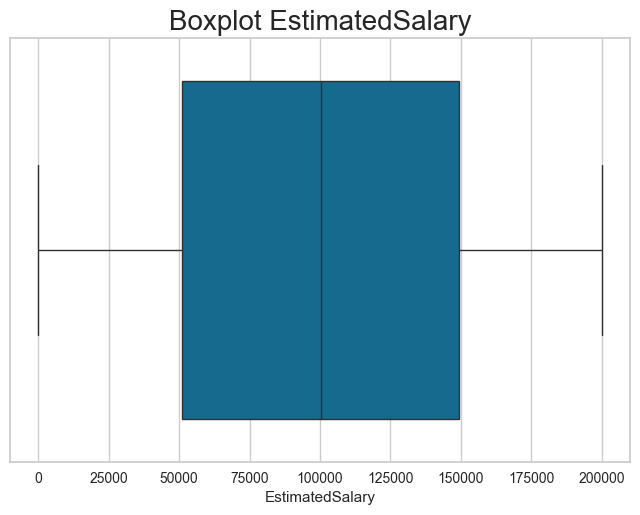

In [146]:
plt.title("Boxplot EstimatedSalary", fontdict = {'fontsize': 20})
sns.boxplot(x=df["EstimatedSalary"])

<Axes: title={'center': 'Boxplot Point Earned'}, xlabel='Point Earned'>

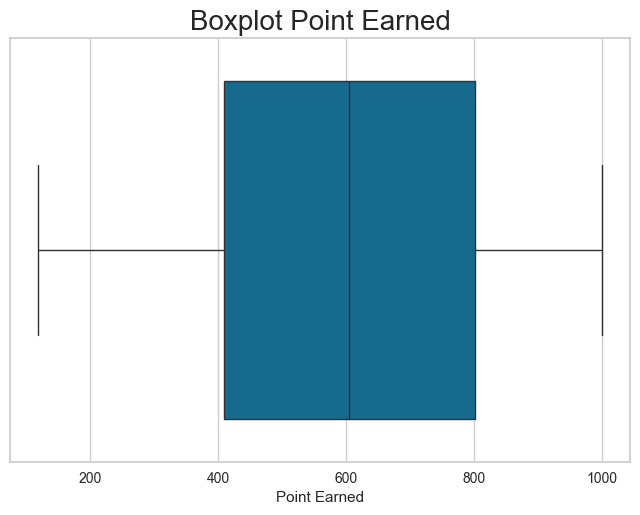

In [147]:
plt.title("Boxplot Point Earned", fontdict = {'fontsize': 20})
sns.boxplot(x=df["Point Earned"])

<Axes: title={'center': 'Boxplot Age'}, xlabel='Age'>

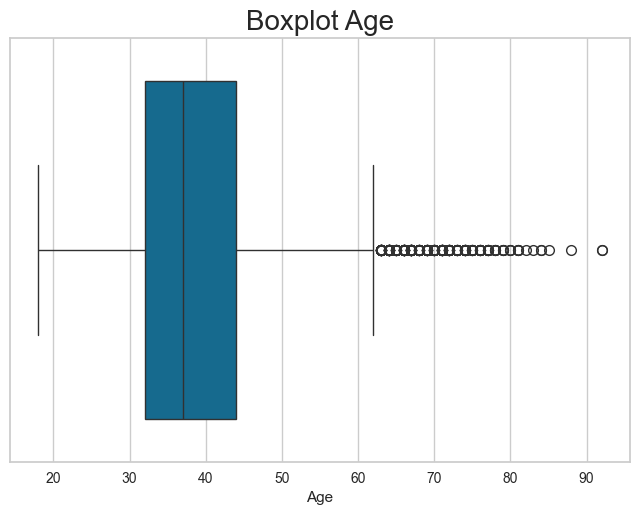

In [148]:
plt.title("Boxplot Age", fontdict = {'fontsize': 20})
sns.boxplot(x=df["Age"])

# In age section also, we have outliers but we will remove these, because they will paly important role in this case.

<Axes: title={'center': 'Variable Card Type'}, xlabel='Card Type', ylabel='count'>

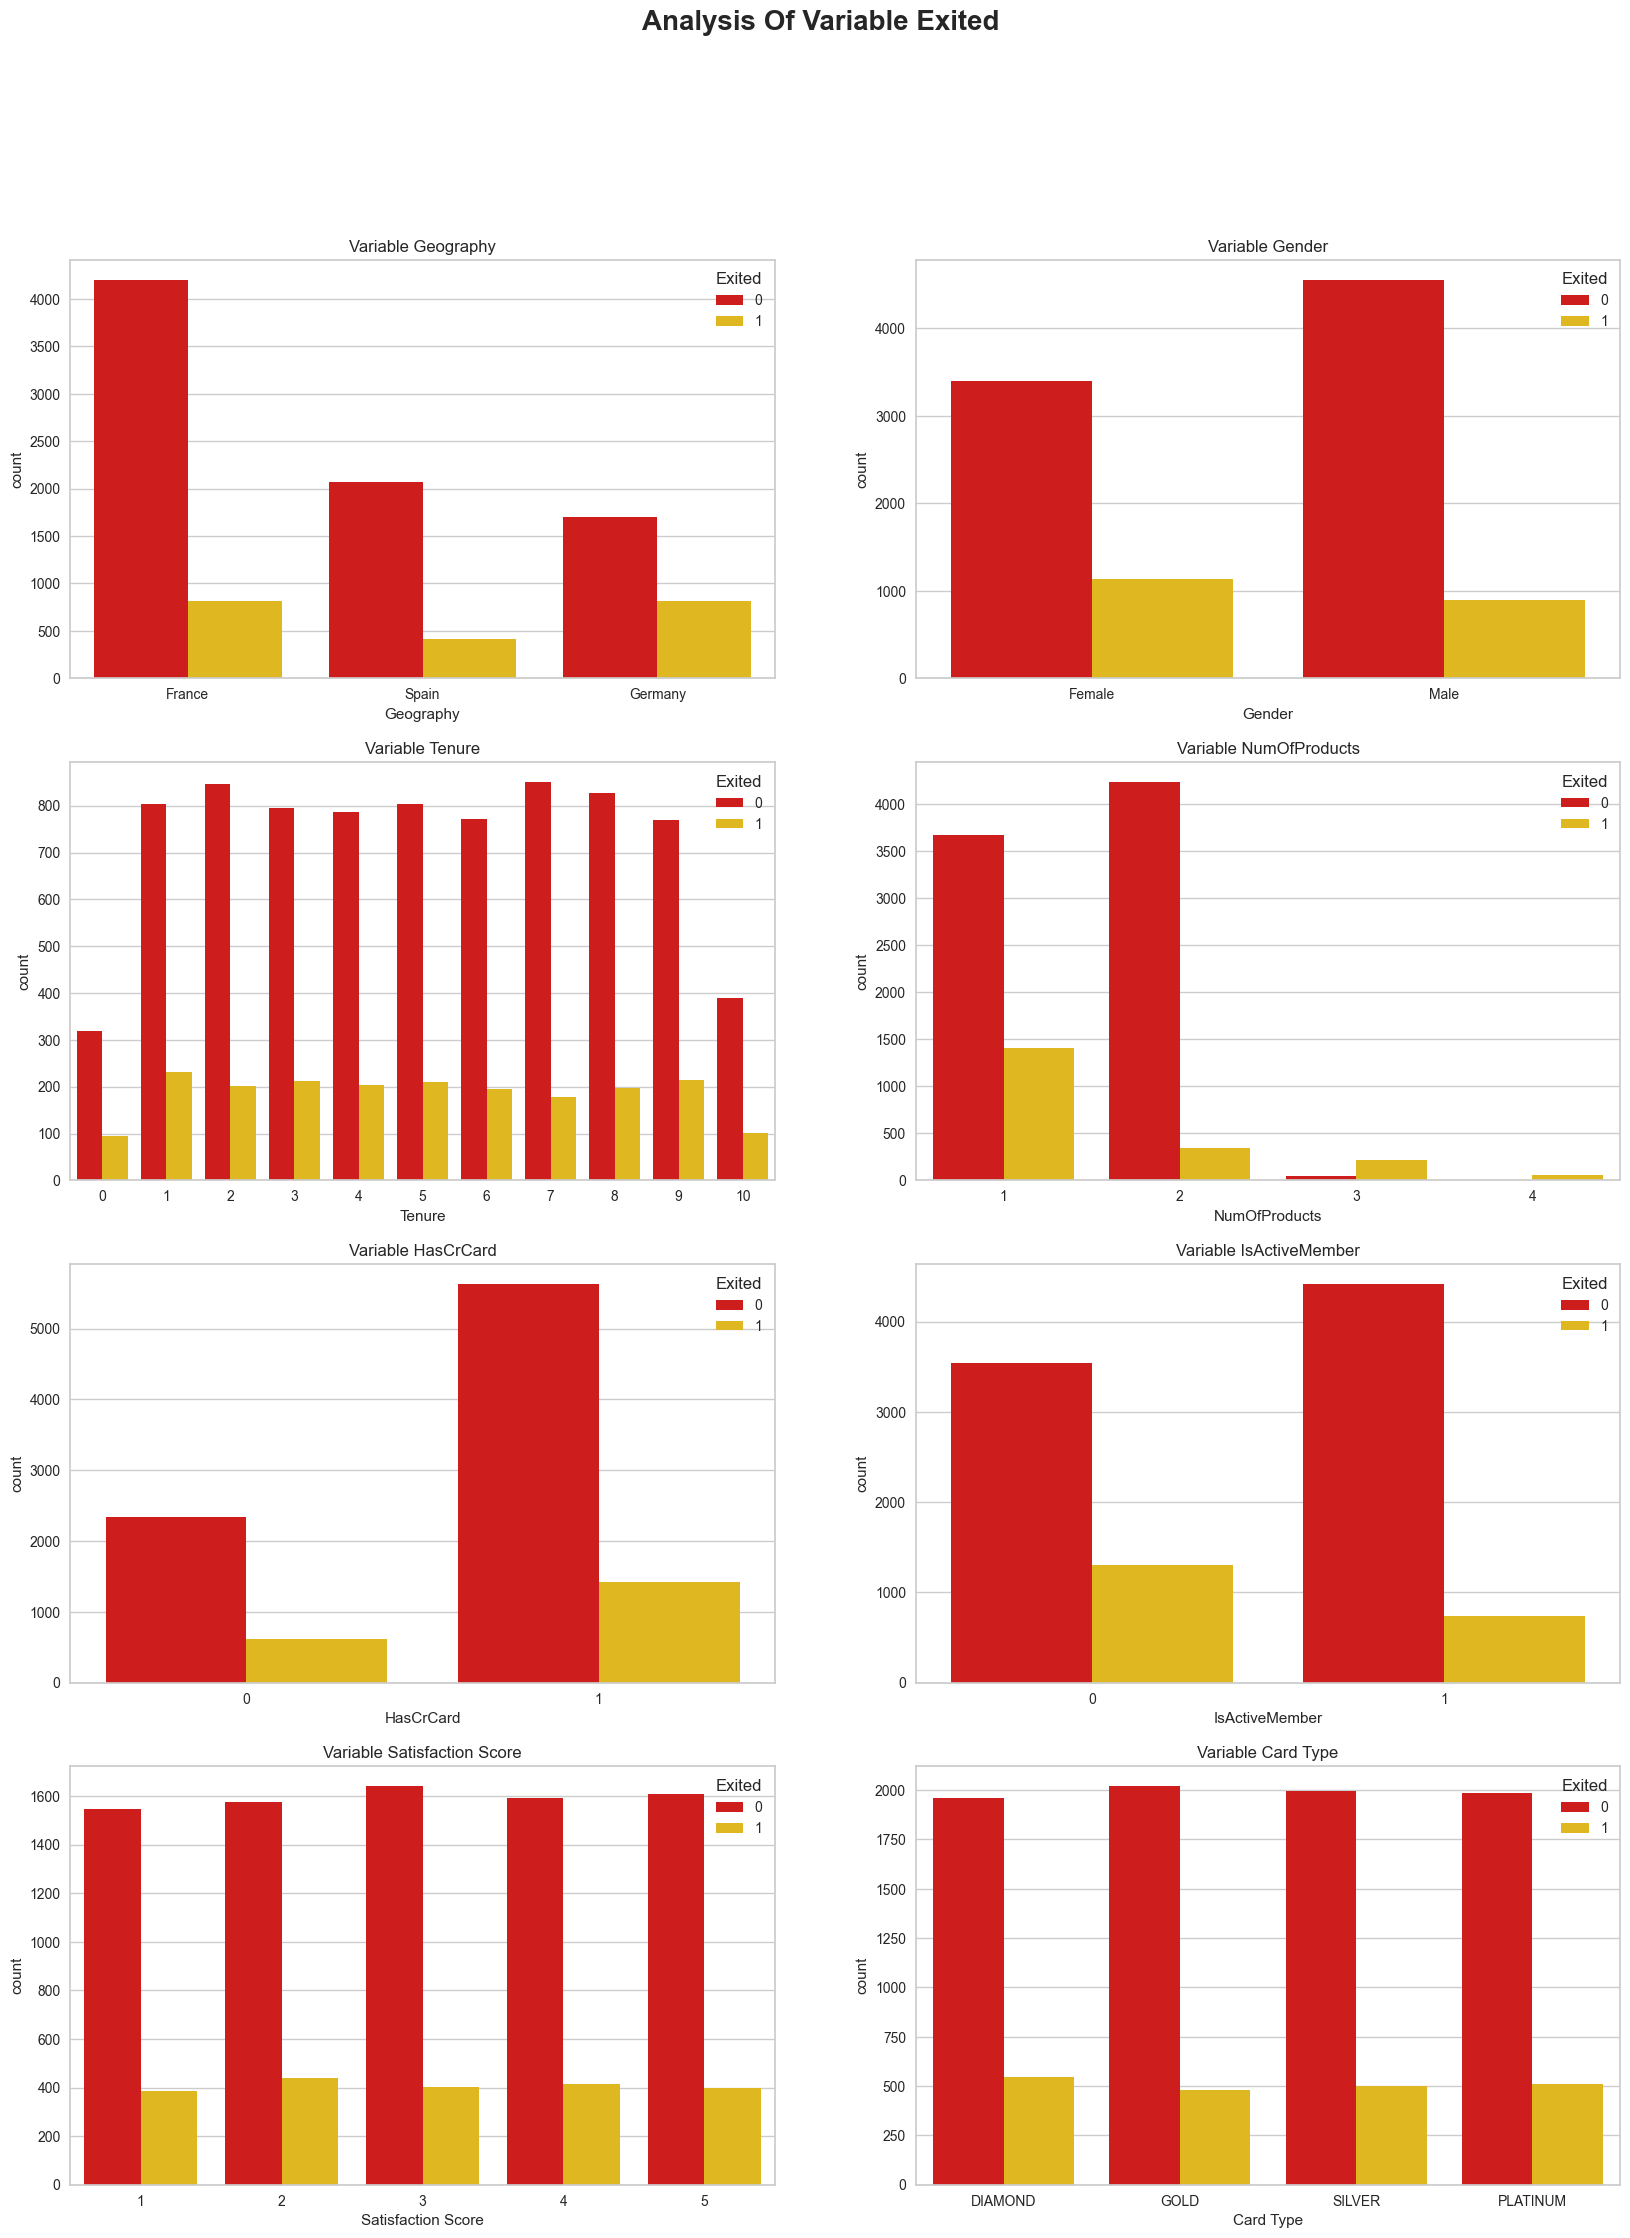

In [149]:
# Bi-variate analysis
plt.figure(figsize = (20, 25))
plt.suptitle("Analysis Of Variable Exited",fontweight="bold", fontsize=20)

plt.subplot(4, 2, 1)
plt.gca().set_title('Variable Geography')
sns.countplot(x = 'Geography', hue = 'Exited', palette = 'hot', data = df)

plt.subplot(4, 2, 2)
plt.gca().set_title('Variable Gender')
sns.countplot(x = 'Gender', hue = 'Exited', palette = 'hot', data = df)

plt.subplot(4, 2, 3)
plt.gca().set_title('Variable Tenure')
sns.countplot(x = 'Tenure', hue = 'Exited', palette = 'hot', data = df)

plt.subplot(4, 2, 4)
plt.gca().set_title('Variable NumOfProducts')
sns.countplot(x = 'NumOfProducts', hue = 'Exited', palette = 'hot', data = df)

plt.subplot(4, 2, 5)
plt.gca().set_title('Variable HasCrCard')
sns.countplot(x = 'HasCrCard', hue = 'Exited', palette = 'hot', data = df)

plt.subplot(4, 2, 6)
plt.gca().set_title('Variable IsActiveMember')
sns.countplot(x = 'IsActiveMember', hue = 'Exited', palette = 'hot', data = df)

plt.subplot(4, 2, 7)
plt.gca().set_title('Variable Satisfaction Score')
sns.countplot(x = 'Satisfaction Score', hue = 'Exited', palette = 'hot', data = df)

plt.subplot(4, 2, 8)
plt.gca().set_title('Variable Card Type')
sns.countplot(x = 'Card Type', hue = 'Exited', palette = 'hot', data = df)

Comparing categorical variables with target variable we cannot observe  any variable that has a very different behavior between the positive and negative result.¶

<Axes: xlabel='Exited', ylabel='Point Earned'>

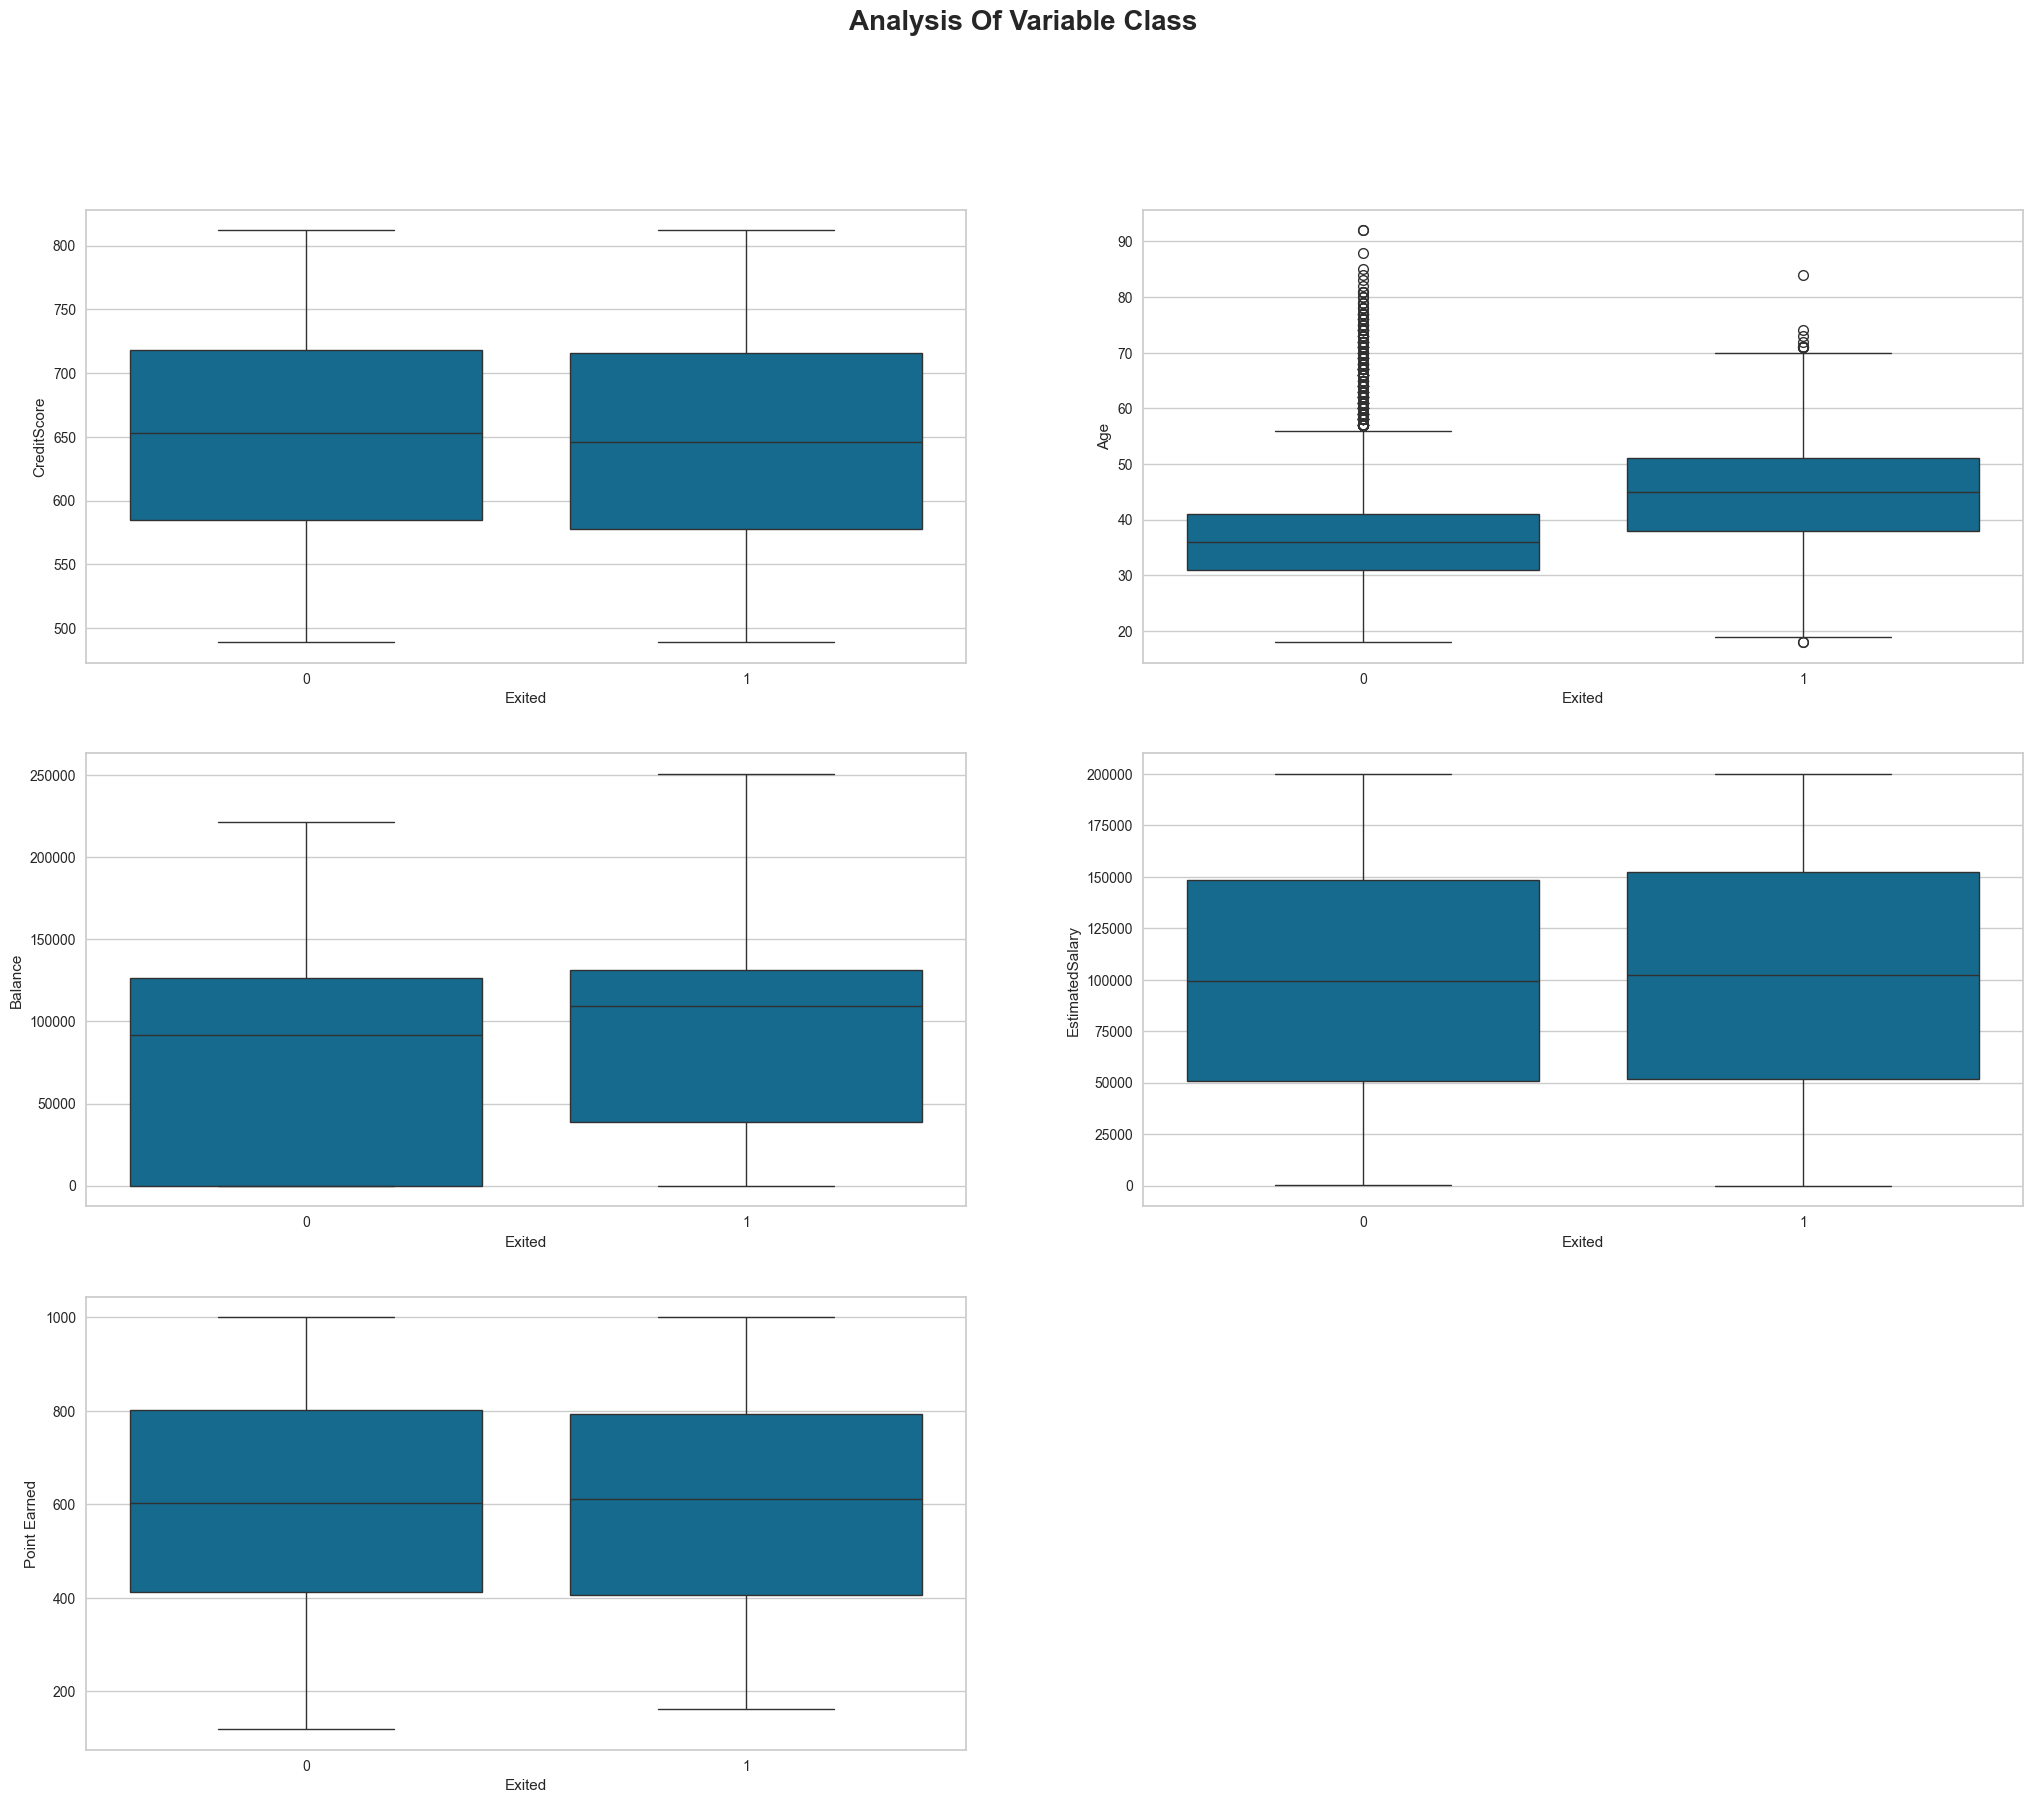

In [150]:
plt.figure(figsize = (25, 20))
plt.suptitle("Analysis Of Variable Class",fontweight="bold", fontsize=20)

plt.subplot(3,2,1)
sns.boxplot(x="Exited", y="CreditScore", data=df)

plt.subplot(3,2,2)
sns.boxplot(x="Exited", y="Age", data=df)

plt.subplot(3,2,3)
sns.boxplot(x="Exited", y="Balance", data=df)

plt.subplot(3,2,4)
sns.boxplot(x="Exited", y="EstimatedSalary", data=df)

plt.subplot(3,2,5)
sns.boxplot(x="Exited", y="Point Earned", data=df)

Here we ccan observe that the older ages above 35 are more likely to churn

In [151]:
# Analyze the churn rate
churn_rate = df['Exited'].mean()
print('Churn Rate:', churn_rate)

Churn Rate: 0.2038


In [152]:
print(df.columns)


Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')


In [153]:
""""
# average balance for churned and retained customers
avg_balance_churned = df[df['Exited'] == 1]['Balance'].mean()
avg_balance_retained = df[df['Exited'] == 0]['Balance'].mean()
print('Average Balance - Churned:', avg_balance_churned)
print('Average Balance - Retained:', avg_balance_retained)
"""

'"\n# average balance for churned and retained customers\navg_balance_churned = df[df[\'Exited\'] == 1][\'Balance\'].mean()\navg_balance_retained = df[df[\'Exited\'] == 0][\'Balance\'].mean()\nprint(\'Average Balance - Churned:\', avg_balance_churned)\nprint(\'Average Balance - Retained:\', avg_balance_retained)\n'

In [154]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


#df = pd.get_dummies(df, columns=['Geography', 'Gender', 'Card Type'],dtype=int,drop_first=True)

# Remove irrelevant columns,top five columns ['Complain', 'Age', 'NumOfProducts', 'IsActiveMember', 'Balance']
#df = df.drop(['RowNumber', 'CustomerId', 'Surname',"HasCrCard","Satisfaction Score","Geography","Gender","Card Type",], axis=1)
#df = df.drop(['RowNumber', 'CustomerId', 'Surname',"HasCrCard","Satisfaction Score","Geography","Gender","Card Type","CreditScore","Tenure","EstimatedSalary","Point Earned","Complain"], axis=1)
#df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

# Split the dataset into features (X) and target variable (y)
df = pd.get_dummies(df, columns=['Geography', 'Gender', 'Card Type'],dtype=int,drop_first=True)

#X = df.drop(columns=['Geography', 'Gender', 'Card Type','Exited'],axis=1)





In [155]:
Y=df.drop(['Exited'],axis=1)
X = Y.values
y = df['Exited']
print(df.columns)

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Satisfaction Score',
       'Point Earned', 'Geography_Germany', 'Geography_Spain', 'Gender_Male',
       'Card Type_GOLD', 'Card Type_PLATINUM', 'Card Type_SILVER'],
      dtype='object')


In [156]:
print(df.columns)


Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Satisfaction Score',
       'Point Earned', 'Geography_Germany', 'Geography_Spain', 'Gender_Male',
       'Card Type_GOLD', 'Card Type_PLATINUM', 'Card Type_SILVER'],
      dtype='object')


In [157]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)
# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X_standard, y, test_size=0.25, random_state=42)


In [158]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_standard, y, test_size=0.25, random_state=42)


In [159]:
! pip install imbalanced-learn

In [160]:
import imblearn


In [161]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_train, y_train = ros.fit_resample(X_train, y_train)

In [162]:
X_train[3]

array([-0.0760901 , -0.56466489,  0.68712986,  1.57202651, -0.91158349,
       -1.54776799,  0.97024255, -0.97634283, -1.4324447 ,  1.21499976,
       -0.57873591, -0.57380915,  0.91241915, -0.57765819, -0.57658047,
       -0.57673443])

In [163]:
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42,class_weight='balanced')

# Fit the model on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

Accuracy: 0.868
Confusion Matrix:
[[1901  102]
 [ 228  269]]


In [164]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

parameters = {
              "n_estimators":[50,70,80,100,120],
              'max_depth': [3, 4, 5, 6, 7, 9, 11],
              'min_samples_split': [2, 3, 4, 5, 6, 7],
              'criterion': ['entropy', 'gini']
             }

model = RandomForestClassifier()
gridRandomForest = RandomizedSearchCV(model, parameters, cv = 5, n_jobs = -1)
#gridRandomForest = GridSearchCV(model, parameters, cv = 5, n_jobs = -1)
gridRandomForest.fit(X_train, y_train)


print('n_estimators: ',gridRandomForest.best_estimator_.n_estimators)
print('criterion: ', gridRandomForest.best_estimator_.criterion)
print('Score: ', gridRandomForest.best_score_)
print('Min Split: ', gridRandomForest.best_estimator_.min_samples_split)
print('Max depth: ', gridRandomForest.best_estimator_.max_depth)

n_estimators:  80
criterion:  gini
Score:  0.9036756091103932
Min Split:  2
Max depth:  11


In [165]:
! pip install yellowbrick


0.844

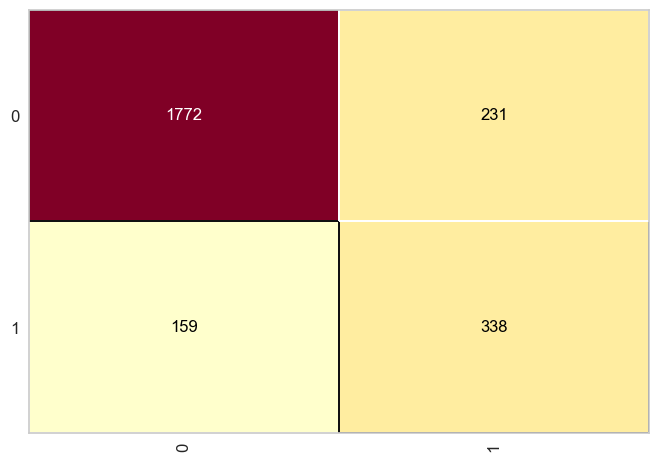

In [166]:
from yellowbrick.classifier import ConfusionMatrix

random_forest = RandomForestClassifier(n_estimators = 100, min_samples_split = 5, max_depth= 11,  criterion = 'entropy', random_state = 0)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

cm = ConfusionMatrix(random_forest)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [167]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90      2003
           1       0.59      0.68      0.63       497

    accuracy                           0.84      2500
   macro avg       0.76      0.78      0.77      2500
weighted avg       0.85      0.84      0.85      2500



In [168]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print('Recall:', recall)
print('Precision:', precision)

Recall: 0.6800804828973843
Precision: 0.5940246045694201


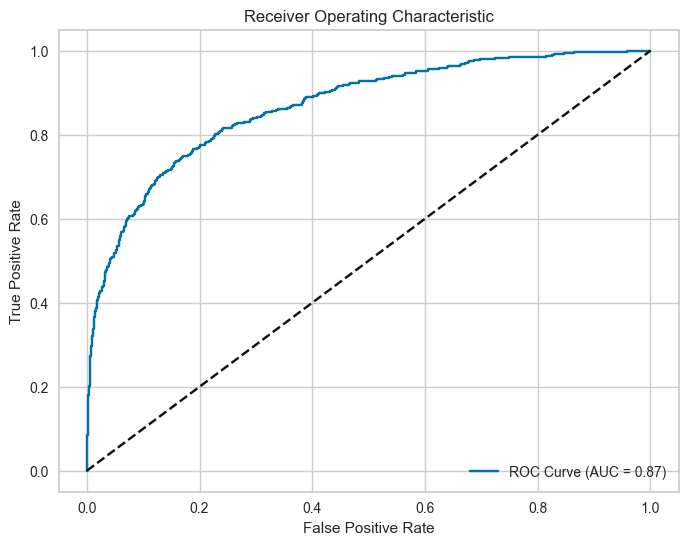

In [169]:
#as our data set is heavily imbalanced, therefore using the roc_auc_score to find the 
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate the probabilities for positive class predictions
y_prob = random_forest.predict_proba(X_test)[:, 1]

# Calculate the false positive rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the AUC score
auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [170]:
feature_imp_random = pd.Series(random_forest.feature_importances_, index = Y.columns).sort_values(ascending = False)
feature_imp_random

Age                   0.279734
NumOfProducts         0.185077
Balance               0.102487
EstimatedSalary       0.077118
Point Earned          0.075335
CreditScore           0.065633
IsActiveMember        0.048095
Tenure                0.042433
Geography_Germany     0.032293
Satisfaction Score    0.026141
Gender_Male           0.022586
HasCrCard             0.010581
Card Type_SILVER      0.008692
Card Type_PLATINUM    0.008267
Geography_Spain       0.008046
Card Type_GOLD        0.007483
dtype: float64

In [171]:
feature_importances = random_forest.feature_importances_

# Select top N features
top_features = Y.columns[np.argsort(feature_importances)[::-1][:10]]

In [172]:
top_features

Index(['Age', 'NumOfProducts', 'Balance', 'EstimatedSalary', 'Point Earned',
       'CreditScore', 'IsActiveMember', 'Tenure', 'Geography_Germany',
       'Satisfaction Score'],
      dtype='object')

In [173]:
! pip install xgboost

In [174]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier



In [175]:
parameters = {'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.3, 0.5, 0.8],
              'max_depth': [1 , 2, 3, 4, 5, 6, 7, 8, 9],
              'min_child_weight': [1, 3, 5, 7, 9],
              'subsample': [0.1, 0.3, 0.5, 0.7, 0.9],
              'colsample_bytree': [0.1, 0.3, 0.5, 0.7, 0.9],
              'n_estimators': [500],
              'gamma': [0.1, 0.3, 0.5, 0.7, 0.9],
              'reg_alpha': [0.1, 0.3, 0.5, 0.7, 0.9],
              'reg_lambda': [0.1, 0.3, 0.5, 0.7, 0.9]
             }

model = XGBClassifier()
xgb_grid = RandomizedSearchCV(model,parameters, cv = 2, n_jobs = -1)
xgb_grid.fit(X_train, y_train)

print('Score: ', xgb_grid.best_score_)
print('Params: ', xgb_grid.best_params_)

Score:  0.9001510320523578
Params:  {'subsample': 0.7, 'reg_lambda': 0.9, 'reg_alpha': 0.7, 'n_estimators': 500, 'min_child_weight': 9, 'max_depth': 5, 'learning_rate': 0.3, 'gamma': 0.3, 'colsample_bytree': 0.9}


0.8296

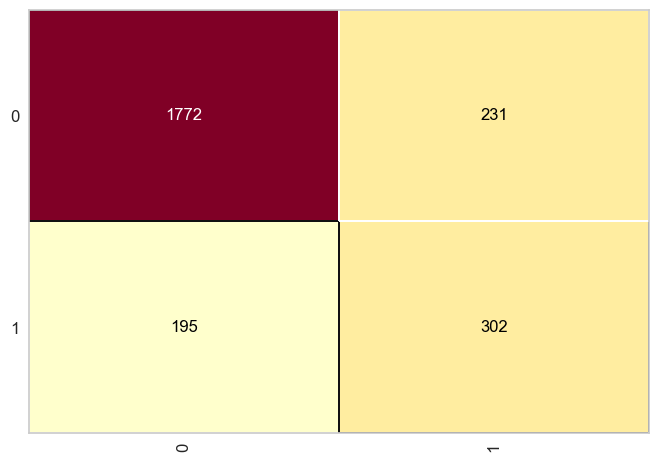

In [176]:
xgb = XGBClassifier(subsample = 0.7, reg_lambda = 0.3, reg_alpha = 0.3, n_estimators = 500, min_child_weight = 3, max_depth = 6, learning_rate = 0.3, gamma = 0.9, colsample_bytree = 0.3, random_state = 0)
xgb.fit(X_train, y_train)
previsoes = xgb.predict(X_test)

cm = ConfusionMatrix(xgb)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

# The accuracy here at XGB is also good, but same problem, the model learned a lot the negative result not the positive one. Therefore let's take random forest model as final model.

In [177]:
classification_xgb_standard = (classification_report(y_test, previsoes))
print(classification_xgb_standard)

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      2003
           1       0.57      0.61      0.59       497

    accuracy                           0.83      2500
   macro avg       0.73      0.75      0.74      2500
weighted avg       0.83      0.83      0.83      2500



In [178]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

features = X
target = y

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(Y.columns),columns = ['Chi Squared Score']) 

featureScores.sort_values(by = 'Chi Squared Score', ascending = False).round(2)

,Chi Squared Score
Balance,7156628.86
EstimatedSalary,51542.37
Age,2299.99
Geography_Germany,225.01
IsActiveMember,118.54
CreditScore,61.86
Gender_Male,51.30
Geography_Spain,20.97
Point Earned,18.02
NumOfProducts,5.01


# Let's try the model perfoemance on top 10 features  

In [221]:
df=pd.read_csv("/Users/ravina/Desktop/Customer-Churn-Records.csv")

In [222]:
Y=df.drop(['Exited'],axis=1)
X = Y.values
y = df['Exited']
print(df.columns)


        

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')


In [270]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Age                 10000 non-null  int64  
 2   Tenure              10000 non-null  int64  
 3   Balance             10000 non-null  float64
 4   NumOfProducts       10000 non-null  int64  
 5   IsActiveMember      10000 non-null  int64  
 6   EstimatedSalary     10000 non-null  float64
 7   Satisfaction Score  10000 non-null  int64  
 8   Point Earned        10000 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 703.2 KB


In [223]:
X=Y.drop(['RowNumber', 'CustomerId', 'Surname', 'Complain','Geography', 'Gender', 'Card Type',"HasCrCard"], axis=1)
y = df['Exited']
print(X.columns)

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'IsActiveMember', 'EstimatedSalary', 'Satisfaction Score',
       'Point Earned'],
      dtype='object')


In [224]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_standard, y, test_size=0.25, random_state=42)

In [225]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_train, y_train = ros.fit_resample(X_train, y_train)

0.8204

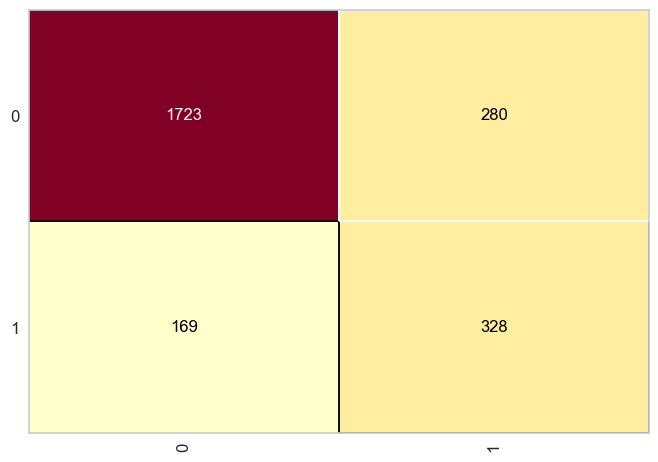

In [226]:
from yellowbrick.classifier import ConfusionMatrix

random_forest = RandomForestClassifier(n_estimators = 100, min_samples_split = 5, max_depth= 11,  criterion = 'entropy', random_state = 0)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

cm = ConfusionMatrix(random_forest)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [241]:
parameters = {
              "n_estimators":[80,100,120,150,200],
              'max_depth': [3, 4, 5, 6, 7, 9, 11],
              'min_samples_split': [2, 3, 4, 5, 6, 7],
              'criterion': ['entropy', 'gini']
             }

model = RandomForestClassifier()
gridRandomForest = RandomizedSearchCV(model, parameters, cv = 5, n_jobs = -1)
#gridRandomForest = GridSearchCV(model, parameters, cv = 5, n_jobs = -1)
gridRandomForest.fit(X_train, y_train)


print('n_estimators: ',gridRandomForest.best_estimator_.n_estimators)
print('criterion: ', gridRandomForest.best_estimator_.criterion)
print('Score: ', gridRandomForest.best_score_)
print('Min Split: ', gridRandomForest.best_estimator_.min_samples_split)
print('Max depth: ', gridRandomForest.best_estimator_.max_depth)

n_estimators:  120
criterion:  gini
Score:  0.8695259275010068
Min Split:  4
Max depth:  11


0.8228

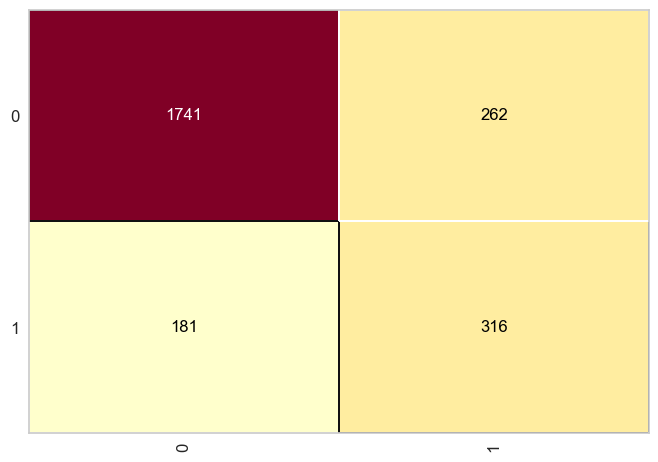

In [265]:
random_forest = RandomForestClassifier(n_estimators = 120, min_samples_split = 4, max_depth= 11,  criterion = 'gini', random_state = 0)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
cm = ConfusionMatrix(random_forest)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [266]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

accuracy=accuracy_score(y_pred,y_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("accuracy:", accuracy)
print('Recall:', recall)
print('Precision:', precision)

accuracy: 0.8228
Recall: 0.635814889336016
Precision: 0.5467128027681661


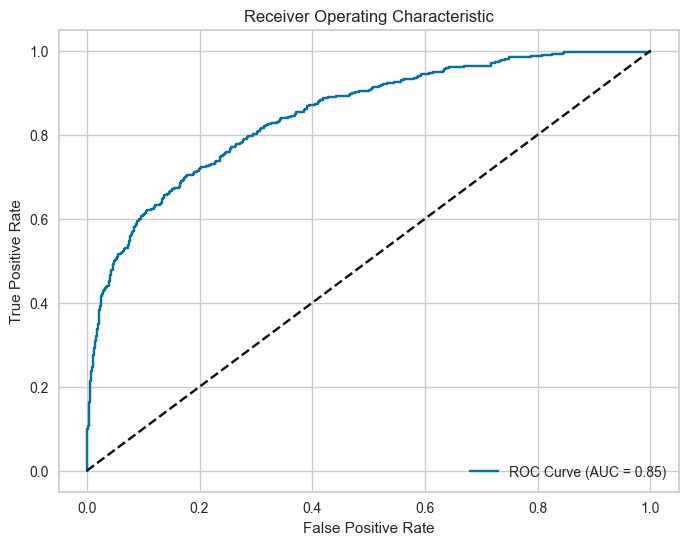

In [267]:
#as our data set is heavily imbalanced, therefore using the roc_auc_score to find the 
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate the probabilities for positive class predictions
y_prob = random_forest.predict_proba(X_test)[:, 1]

# Calculate the false positive rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the AUC score
auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()